In [1]:
%cd ..

/Users/maimai/Desktop/project/May


In [2]:
import builtins
builtins.uclresearch_topic = 'GIVENCHY'
# builtins.uclresearch_topic = 'HAWKING'
# builtins.uclresearch_topic = 'NYC'
# builtins.uclresearch_topic = 'FLORIDA'
from configuration import config
from configuration import dzcnapy_plotlib as dzcnapy


from tqdm import tqdm
import os
import pickle
import math
import numpy as np
import networkx as nx
import pandas as pd
from collections import Counter
import operator

# Plotting
import matplotlib
# # matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Networkx
from networkx.drawing.nx_agraph import graphviz_layout



('Reading config file from location: '
 '/Users/maimai/Desktop/project/May/configuration/env.properties')
{'calculate': {'analysis': True,
               'network': True,
               'uniquetweets': True,
               'uniqueusers': True},
 'data': {'dates': ['2018-03-11', '2018-03-12', '2018-03-13'],
          'eventname': "Givenchy's Death",
          'phrases': ['givenchy%20death', 'givenchy%20passed%20away'],
          'starttime': 'Mar 12 08:20:00 -0500 2018'},
 'path': {'crawl': {'followers': '/Users/maimai/Desktop/project/May/followers',
                    'friends': '/Users/maimai/Desktop/project/May/friends'},
          'cwd': '/Users/maimai/Desktop/project/May/data/givenchy',
          'ml': '/Users/maimai/Desktop/project/May/data/givenchy/pickle',
          'networkx': {'all': '/Users/maimai/Desktop/project/May/data/givenchy/pickle/networkx_all.dat',
                       'friends': '/Users/maimai/Desktop/project/May/data/givenchy/pickle/networkx_friends.dat',
       

In [3]:
n_bytes = 2**31
max_bytes = 2**31 - 1

path = "/Users/maimai/Desktop/project/May/data/givenchy/pickle"  

def write_to_pickle(file_path, data):

    bytes_out = pickle.dumps(data)
    with open(file_path, 'wb') as f_out:
        for idx in range(0, n_bytes, max_bytes):
            f_out.write(bytes_out[idx:idx+max_bytes])

def load_pickle(file_path):
    bytes_in = bytearray(0)
    input_size = os.path.getsize(file_path)
    with open(file_path, 'rb') as f_in:
        for _ in range(0, input_size, max_bytes):
            bytes_in += f_in.read(max_bytes)
    return pickle.loads(bytes_in)



In [4]:

project_name = config.settings['data']['eventname']
timeframe = config.settings['timeframe']
save_to_file = config.settings['save_to_file'] == 'True'
window = 30
# unique_users = config.load_users_dataframe()
# users = load_pickle(path+'/users.dat')
# network_friends = config.load_networkx_friends()
# network_potential = config.load_networkx_potential()
unique_users = load_pickle(path+'/Stanford_network_simulation_active_low.pkl')
# unique_users

In [5]:
# unique_users = load_pickle(path+'/Stanford_network_simulation_a.pkl')
users= load_pickle(path+'/users.dat')
users

,contributors_enabled,created_at,description,favourites_count,followers_count,followers_json,friends_count,friends_json,geo_enabled,id,lang,listed_count,location,name,protected,screen_name,statuses_count,url,verified
0,0,2010-11-11 03:59:09,,548,2090,None,46,None,1,214328887,en,65,,солнечная,1,xsolnechnaya,201,None,0
1,0,2009-04-22 22:44:05,https://t.co/XA34weUL7o Join Now for Exclusive...,38,305257,None,181,None,1,34428380,en,4929,"Nashville, TN",JERMbeats,0,schzimmydeanie,5695,https://t.co/XA34weUL7o,1
2,0,2008-11-02 17:07:55,Paramore Spain. primera web en español sobre P...,31,11756,None,498,None,0,17116707,en,93,España,ParamoreSpain,0,paramorespain,5124,https://t.co/s40bqOYO0F,0
3,0,2009-04-03 01:03:15,A maior fonte de informações sobre a banda Par...,4449,57992,None,1482,"[823625606705410052, 62089415, 976610561126490...",1,28465635,pt,894,Brasil,Paramore Brasil,0,paramorebrasil,35499,https://t.co/0prUO4vpzM,0
4,0,2011-09-26 21:58:16,Your Swedish/worldwide source of everything Pa...,1968,15033,None,219,None,1,380580781,en,45,Sweden / Worldwide,🙃 Paramore Sweden 🇸🇪,0,SWEparamore,20720,None,0
5,0,2009-01-14 21:32:04,Watch @nothingnowhere's new video for his trac...,2158,284075,None,68,None,0,18996905,en,1934,"New York, NY",Fueled By Ramen,0,FueledByRamen,14602,https://t.co/UhTmkm9v1w,1
6,0,2010-11-29 15:23:21,@paramore OFFICIAL FAN CLUB IN DOMINICAN REPUB...,309,2121,None,206,None,0,221036078,es,12,Republica dominicana,Paramore DomRep,0,paramoreDomRep,6933,http://t.co/hMJ2bymUMa,0
7,0,2010-06-08 16:33:07,Der Twitter-Account des größten deutschen Para...,74,4710,None,35,None,0,153460275,de,49,Deutschland,Paramorefans.de,0,Paramorefansde,807,http://t.co/ehFxXNbWFW,0
8,0,2010-01-23 22:17:51,STUCK ON A RIOT! | Fan Club Oficial de Paramor...,350,11627,None,934,None,0,107830991,es,63,Chile,Paramore Chile,0,paramoreCL,3021,https://t.co/qVna93dOTq,0
9,0,2008-12-04 14:49:42,Fly South Music Group / Nashville Is The Reason,9,16996,None,552,"[58528137, 48244546, 118899807, 16814072, 1672...",1,17868918,en,238,"Nashville, Tenn",Adam Samiljan,0,adamsamiljan,4153,None,0


In [6]:
unique_users['user']=users['screen_name']
unique_users['source_index'] = None

# d=0
for i in range(len(unique_users)):
    source_id = unique_users.loc[i,'source_id']
    source_index = unique_users[unique_users.user_id.isin([source_id])].index.values
#     print(source_index)
    if len(source_index) != False:
        unique_users.loc[i,'source_index']=int(source_index)
        unique_users.loc[i,'time_since_seed']=unique_users.loc[i,'time_lapsed']-unique_users.loc[int(source_index),'time_lapsed']
        

In [7]:
a=[0,1,2,3,4,5,6,7,8,9,10,11]
unique_users=unique_users[unique_users.generations.isin(a)]
unique_users

,t_current,user_id,source_candidates,infec_candidates,followers_count,friends_count,source_id,seed_user_id,SIR,generations,time_lapsed,time_since_seed,user,source_index
0,30,214328887,"[105, 62, 147, 148, 42, 124, 32, 10, 96, 18, 1...","[1, 83, 70, 16, 40, 4, 76, 113, 156, 75, 39, 6...",2090,46,214328887,214328887,1,0,0,0,xsolnechnaya,0
1,270,34428380,"[0, 12, 11, 110, 33, 118, 167, 78, 18, 74, 90,...","[51, 34, 93, 9, 58, 72, 135, 149, 1801, 2947, ...",305257,181,24282101,76576753,1,8,241,60,schzimmydeanie,36252
3,300,28465635,"[2, 111, 36, 158, 83, 118, 179, 148, 65, 130, ...","[161, 38, 86, 76, 12, 84, 72, 141, 100, 8, 53,...",57992,1482,28176041,76576753,1,8,271,30,paramorebrasil,24761
5,300,18996905,"[4, 64, 42, 173, 66, 155, 153, 112, 43, 156, 2...","[63, 129, 9, 1, 72, 4170, 14875, 18521, 14885,...",284075,68,214328887,214328887,1,1,271,271,FueledByRamen,0
9,300,17868918,"[8, 87, 123, 20, 37, 16, 66, 95, 80, 111, 69, ...","[51, 39, 81, 93, 58, 122, 72, 144, 4159, 4170,...",16996,552,264093459,76576753,1,9,271,30,adamsamiljan,40743
10,300,151338729,"[28, 50, 54, 112, 36, 20, 73, 71, 173, 69, 18,...","[11, 22, 63, 8, 35, 94, 33, 58, 83, 149, 23, 2...",41712,198,103598216,76576753,1,9,271,30,USParamore,47
11,300,222261763,"[10, 84, 75, 23, 31, 137, 2, 74, 20, 105, 88, ...","[13, 27, 51, 42, 118, 1, 58, 127, 59, 129, 147...",5399,512,278652553,76576753,1,9,271,30,TaylorYorkArg,21694
12,270,19705747,"[159, 62, 3, 61, 82, 87, 193, 146, 33, 165, 80...","[1, 51, 84, 58, 72, 4112, 16960, 4219, 22771, ...",669869,600,2367911,76576753,1,8,241,30,KerrangMagazine,155
17,270,17434613,"[16, 78, 131, 42, 109, 133, 110, 147, 45, 30, ...","[72, 132, 58, 92, 51, 74, 1, 84, 9806, 17025, ...",57400,212,8360682,76576753,1,4,241,30,ElektraOficial,25363
18,300,153226312,"[15, 19, 60, 117, 74, 47, 53, 43, 135, 49, 8, ...","[22, 2, 4, 59, 34, 25, 118, 79, 123, 146, 112,...",13085,28,103598216,76576753,1,9,271,30,MutilatedFace,47


In [8]:
network_all = nx.DiGraph()
for i in tqdm(range(len(unique_users))):
    index = unique_users.index[i]
    network_all.add_node(index,
                         user = unique_users.loc[index, 'user'],
                         user_id = unique_users.loc[index, 'user_id'],
                         time_lapsed = unique_users.loc[index, 'time_lapsed'],
                         followers_count = unique_users.loc[index, 'followers_count'],
                         friends_count = unique_users.loc[index, 'friends_count'],
                         generation = unique_users.loc[index, 'generations'],
                         time_since_seed = unique_users.loc[index, 'time_since_seed'],
                        )
    source_index = unique_users.loc[index, 'source_index']
#     print(source_index)
    network_all.add_edge(source_index, index)
len(network_all)

100%|██████████| 5885/5885 [00:01<00:00, 5435.05it/s]


5885

In [9]:
def get_colors(depth):
    return sns.cubehelix_palette(depth, start=3, rot=1, reverse=True)
    sns.palplot(colors)
    
def plot_network(graph, title):
    plt.axis('off')
    pos = graphviz_layout(graph)
    nx.draw_networkx(graph, pos=pos, with_labels=False, **dzcnapy.small_attrs)
    depth = max(nx.get_node_attributes(graph,'generation').values()) + 1
    colors = get_colors(depth)
    color = [colors[graph.node[n]["generation"]] for n in graph]
    dzcnapy.small_attrs["node_color"] = color
    patchList = []
    for index in range(depth):
        data_key = mpatches.Patch(color=colors[index], label='Generation {}'.format(index))
        patchList.append(data_key)
    plt.legend(handles=patchList)
    dzcnapy.set_extent(pos, plt)
    dzcnapy.plot(title, [15, 15], save=True)

/Applications/anaconda3/lib/python3.6/site-packages/pygraphviz/agraph.py:1341: RuntimeWarning: Warning: Could not load "/Applications/anaconda3/lib/graphviz/libgvplugin_pango.6.dylib" - file not found

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


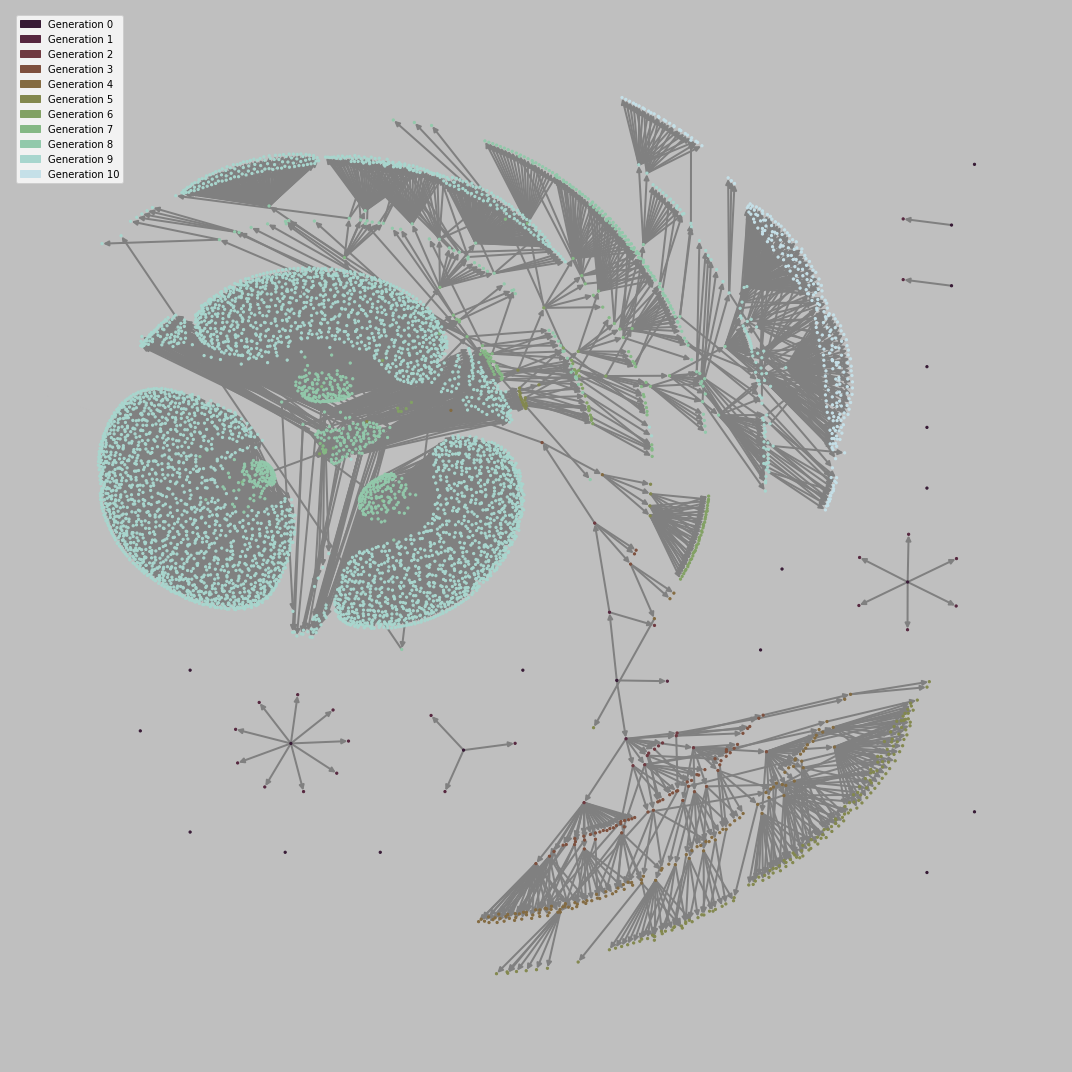

In [13]:
plot_network(network_all, "Single-seeding Strategy (active_low)")

In [11]:
# #设置x,y轴的数值
# x = np.linspace(0, 10, 1000)
# y = np.sin(x)
# #创建绘图对象，figsize参数可以指定绘图对象的宽度和高度，单位为英寸，一英寸=80px
# plt.figure(figsize=(8,4))
# #在当前绘图对象中画图（x轴,y轴,给所绘制的曲线的名字，画线颜色，画线宽度）
# plt.plot(x,y,label="$sin(x)$",color="red",linewidth=2)
# #X轴的文字
# plt.xlabel("Time(s)")
# #Y轴的文字
# plt.ylabel("Volt")
# #图表的标题
# plt.title("PyPlot First Example")
# #Y轴的范围
# plt.ylim(-1.2,1.2)
# #显示图示
# plt.legend()
# plt.show()
# plt.savefig("sinx.jpg")
for i in range(0,11):
    count = len(unique_users[unique_users.generations.isin([i])])
    print(count)

time = unique_users['time_lapsed'].unique()
time

20
23
13
66
124
177
69
85
677
4353
278


array([0, 241, 271, 211, 181, 121, 151, 31, 61, 91, 1], dtype=object)

In [12]:
#  from scipy.interpolate import spline

# xnew = np.linspace(T.min(),T.max(),300) #300 represents number of points to make between T.min and T.max

# power_smooth = spline(T,power,xnew)

# plt.plot(xnew,power_smooth)

NameError: name 'T' is not defined

In [ ]:
#  from scipy.interpolate import spline
# with plt.style.context(('ggplot')):
#     plt.figure(figsize=(5,4))
# #     x=np.linspace(30,150,5)
#     x=np.linspace(30,150,5)
#     y=[5,865,4290,8175,6832]
    
#     xnew = np.linspace(x.min(),x.max(),300)
#     power_smooth = spline(x,y,xnew)
#     plt.plot(xnew,power_smooth,color='green',label='Degree')

#     #     ax.plot(rf.FPR, rf.TPR, color = 'red', label = 'RF: '+str(rf.AUC))
#     #     ax.plot(lr.FPR, lr.TPR, color = 'black', label = 'LR: '+str(lr.AUC))
    
#     plt.xlabel('Time (min)')
#     plt.ylabel('The number of infected nodes')
#     plt.legend(loc='lower right')
#     #plt.title("ROC against different CTR models")

#     plt.show()
#     #     plt.savefig("models.png")